RUNNING ON PROJECT 4 INSTANCE

In [172]:
import pymongo
import re
import requests
import pandas as pd
import numpy as np
import urllib
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
client = pymongo.MongoClient('35.167.189.162', 27016)

In [4]:
client.database_names()

['admin', 'local', 'project4_database', 'test', 'twitter']

In [5]:
db_ref = client.project4_database

## Extracting machine learning collection from MongoDB and converting from dict to df

In [6]:
coll_ref = db_ref.my_project4_collection

In [7]:
cursor = coll_ref.find_one()

cursor

sample_docs = (cursor)

In [8]:
sample_docs.keys()

dict_keys(['_id', 'pageid', 'title', 'category', 'text'])

In [9]:
from_mongo_ml_df = pd.DataFrame(sample_docs)

In [10]:
from_mongo_ml_df.head(5)

,_id,category,pageid,text,title
0,5a1650a4608b9000b627015c,Machine learning,43385931,data exploration is an approach similar to ini...,Data exploration
1,5a1650a4608b9000b627015c,Machine learning,49082762,these datasets are used for machinelearning re...,List of datasets for machine learning research
10,5a1650a4608b9000b627015c,Machine learning,50773876,algorithm selection sometimes also called peri...,Algorithm selection
100,5a1650a4608b9000b627015c,Machine learning,28037054,large margin nearest neighbor lmnn classificat...,Large margin nearest neighbor
1000,5a1650a4608b9000b627015c,Machine learning,405484,jrgen schmidhuber born NUMBER january NUMBER i...,Jürgen Schmidhuber


In [11]:
from_mongo_ml_df.shape

(1075, 5)

## Extracting business software collection from MongoDB and converting from dict to df

In [12]:
coll_ref_bs = db_ref.my_project4_collection_bs

In [13]:
cursor_2 = coll_ref_bs.find_one()

cursor_2

sample_docs_2 = (cursor_2)

In [14]:
sample_docs_2.keys()

dict_keys(['_id', 'pageid', 'title', 'category', 'text'])

In [103]:
from_mongo_bs_df = pd.DataFrame(sample_docs_2)

In [104]:
from_mongo_bs_df.head()

,_id,category,pageid,text,title
0,5a165d59608b9000b627015d,Business software,1037763,business software or a business application is...,Business software
1,5a165d59608b9000b627015d,Business software,41270069,accusystems llc is an american company headqua...,AccuSystems
10,5a165d59608b9000b627015d,Business software,35959361,the architecture of interoperable information ...,Architecture of Interoperable Information Systems
100,5a165d59608b9000b627015d,Business software,11028436,facl is a software system for management of pu...,Facíl
1000,5a165d59608b9000b627015d,Business software,25822348,microsoft dynamics erp is enterprise resource ...,Microsoft Dynamics ERP


In [105]:
from_mongo_bs_df.shape

(1918, 5)

In [106]:
# for index, row in from_mongo_ml_df.iterrows():
#     print(row['title'][:10])

### Combining two classes (machine learning, business software) into a single data frame to save on mongo 

In [211]:
ml_bs_df = pd.DataFrame.append(from_mongo_ml_df, from_mongo_bs_df)

In [212]:
ml_bs_df.shape

(2993, 5)

In [213]:
ml_bs_df.category.unique()

array(['Machine learning', 'Business software'], dtype=object)

In [219]:
ml_bs_df.tail()

,_id,category,pageid,text,title
995,5a165d59608b9000b627015d,Business software,13961495,mapics is commercial erp software used to cont...,MAPICS
996,5a165d59608b9000b627015d,Business software,52919310,metasfresh is an open source free software ent...,Metasfresh
997,5a165d59608b9000b627015d,Business software,54083259,microsoft dynamics NUMBER for finance and oper...,Microsoft Dynamics 365 for Finance and Operations
998,5a165d59608b9000b627015d,Business software,1597852,microsoft dynamics ax is one of microsofts ent...,Microsoft Dynamics AX
999,5a165d59608b9000b627015d,Business software,27631110,microsoft dynamics cNUMBER is a business softw...,Microsoft Dynamics C5


### Inserting combined df into mongo to save time in the next jupyter notebook (also dropping columns)

In [243]:
ml_bs_df.index

Index(['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005',
       ...
       '990', '991', '992', '993', '994', '995', '996', '997', '998', '999'],
      dtype='object', length=2993)

In [244]:
df = ml_bs_df.drop(['_id', ], axis=1) 

In [248]:
df = df.set_index(['pageid'])

In [249]:
df.head()

,category,text,title
pageid,,,
43385931,Machine learning,data exploration is an approach similar to ini...,Data exploration
49082762,Machine learning,these datasets are used for machinelearning re...,List of datasets for machine learning research
50773876,Machine learning,algorithm selection sometimes also called peri...,Algorithm selection
28037054,Machine learning,large margin nearest neighbor lmnn classificat...,Large margin nearest neighbor
405484,Machine learning,jrgen schmidhuber born NUMBER january NUMBER i...,Jürgen Schmidhuber


In [251]:
df.shape

(2993, 3)

In [254]:
combined_json = df.reset_index().to_json()

In [257]:
from collections import OrderedDict
combined_json_dict = json.loads(combined_json, object_pairs_hook=OrderedDict)

In [258]:
combined_json_dict.keys()

odict_keys(['pageid', 'category', 'text', 'title'])

In [214]:
coll_ref_combined = db_ref.my_project4_combined_df

In [215]:
client.database_names(), db_ref.collection_names()

(['admin', 'local', 'project4_database', 'test', 'twitter'],
 ['my_project4_collection', 'my_project4_collection_bs'])

In [259]:
mongo_combined = coll_ref_combined.insert_one(combined_json_dict)

### Label Encode the Categories


In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le = LabelEncoder()
ml_bs_df['category_numerical'] = le.fit_transform(ml_bs_df['category'])

In [150]:
ml_bs_df.shape

(2993, 6)

In [151]:
ml_bs_df.category_numerical.unique()

array([1, 0])

In [152]:
smp30_ml_bs_df = ml_bs_df.sample(900)

In [153]:
smp30_ml_bs_df.shape

(900, 6)

### Prepare Document Term Matrix


In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [155]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')

### TFIDF


In [156]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(smp30_ml_bs_df.text)

In [157]:
document_term_matrix_sps

<900x38060 sparse matrix of type '<class 'numpy.float64'>'
	with 208050 stored elements in Compressed Sparse Row format>

In [158]:
document_term_matrix_df = pd.DataFrame(document_term_matrix_sps.toarray(),
                                       index=smp30_ml_bs_df.index,
                                       columns=tfidf_vectorizer.get_feature_names())

In [222]:
pd.concat([smp30_ml_bs_df.text, document_term_matrix_df], axis=1).sample(10)

,text,aa,aaa,aaabc,aaabcaaabcaaabcaaabc,aaai,aaainumber,aaas,aachen,aachenhsu,...,zwart,zwnumber,zx,zxnumber,zxtimes,zxy,zyl,zyrion,zzapnumber,zzero
1798,sportsml is an xml news exchange standard of t...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535,xcom interceptor is the fourth main game in th...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1249,borland enterprise server also known as borlan...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
868,collaborative filtering cf is a technique used...,0.0,0.0,0.0,0.0,0.0,0.012619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1473,capital program management software cpms refer...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1739,topology and orchestration specification for c...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
903,in probability theory and related fields a mar...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,product data management pdm is the business fu...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,emergency hospital formerly titled sarahs emer...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,cNUMBER NUMBER is an algorithm used to generat...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Compute SVD of Document Term Matrix


In [160]:
from sklearn.decomposition import TruncatedSVD

In [161]:
n_components = 2
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [162]:
svd_matrix = SVD.fit_transform(document_term_matrix_df)

- The first component only captures 10% of the variance of the data.
- The second component only captures 16.0% of the vairance in the data.

In [163]:
SVD.explained_variance_ratio_

array([ 0.00967052,  0.01781016])

In [164]:
svd_matrix[:4]

array([[ 0.10739484, -0.07194498],
       [ 0.14536043, -0.09425818],
       [ 0.28359441, -0.14352293],
       [ 0.20681142, -0.15117311]])

#### Load SVD Matrix with Documents and Labels

In [165]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=document_term_matrix_df.index,
                                        columns=component_names)
latent_semantic_analysis['text'] = smp30_ml_bs_df.text
latent_semantic_analysis['category'] = smp30_ml_bs_df.category

In [166]:
latent_semantic_analysis.sample(4)

,component_1,component_2,text,category
24,0.265227,-0.182719,business intelligence software is a type of ap...,Business software
857,0.208182,0.187168,quickprop is an iterative method for determini...,Machine learning
503,0.171432,-0.170352,software star is a NUMBER game released by kev...,Business software
406,0.176027,-0.003590,neurosolutions is a neural network development...,Machine learning


In [167]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [168]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

### Display Top Terms for Each Component


#### Top 10 Terms for Component 1

In [169]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)

,component_1,component_2,abs_component_1,abs_component_2
number,0.670196,-0.179121,0.670196,0.179121
displaystyle,0.348665,0.677153,0.348665,0.677153
learning,0.115628,0.103032,0.115628,0.103032
data,0.111457,-0.013368,0.111457,0.013368
software,0.094019,-0.137798,0.094019,0.137798
game,0.086714,-0.150544,0.086714,0.150544
management,0.085121,-0.144398,0.085121,0.144398
model,0.072367,0.040975,0.072367,0.040975
algorithm,0.072098,0.101104,0.072098,0.101104
neural,0.070113,0.026618,0.070113,0.026618


#### Top 10 Terms for Component 2

In [170]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(10)

,component_1,component_2,abs_component_1,abs_component_2
displaystyle,0.348665,0.677153,0.348665,0.677153
number,0.670196,-0.179121,0.670196,0.179121
game,0.086714,-0.150544,0.086714,0.150544
management,0.085121,-0.144398,0.085121,0.144398
software,0.094019,-0.137798,0.094019,0.137798
project,0.065306,-0.107431,0.065306,0.107431
learning,0.115628,0.103032,0.115628,0.103032
algorithm,0.072098,0.101104,0.072098,0.101104
mathbf,0.057917,0.096877,0.057917,0.096877
business,0.059671,-0.095226,0.059671,0.095226


### Plot Top Two Components

(-0.5, 1)

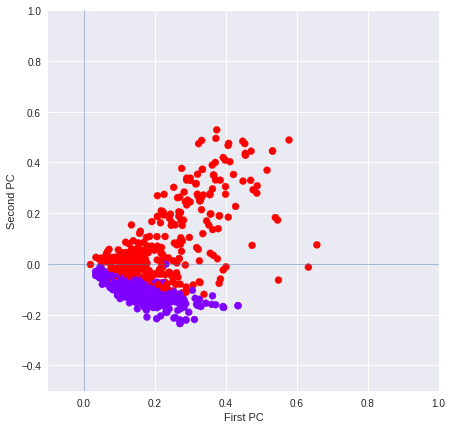

In [175]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=smp30_ml_bs_df['category_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

(-0.1, 1)

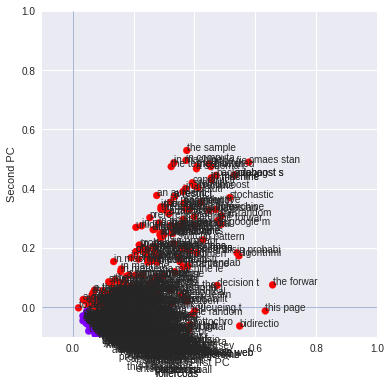

In [176]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

strings = smp30_ml_bs_df['text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])

plt.scatter(pc_1, pc_2, c=smp30_ml_bs_df['category_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

(-0.3, 0.6)

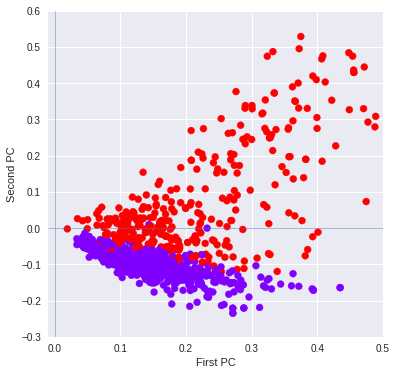

In [195]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=smp30_ml_bs_df['category_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.01,.5)
plt.ylim(-.3,.6)

In [196]:
ml_mask = latent_semantic_analysis.category == 'Machine learning'

In [197]:
latent_semantic_analysis[ml_mask]

,component_1,component_2,text,category
330,0.214843,-0.076612,opennn open neural networks library is a softw...,Machine learning
724,0.120766,0.039382,in function optimization fitness approximation...,Machine learning
1019,0.154888,0.065429,brown clustering is a hard hierarchical agglom...,Machine learning
880,0.211191,-0.032500,algorithmic composition is the technique of us...,Machine learning
2,0.335787,0.119573,machine learning is a field of computer scienc...,Machine learning
731,0.178774,0.003060,ipo underpricing is the increase in stock valu...,Machine learning
1026,0.093022,-0.033575,interactive machine translation imt is a speci...,Machine learning
562,0.102763,-0.037259,anne otate is a free webbased application that...,Machine learning
504,0.106741,-0.023474,textual casebased reasoning is a subtopic of c...,Machine learning
269,0.097918,0.055648,the counterpropagation network is a hybrid net...,Machine learning


### Mischaracterized Term 


In [198]:
latent_semantic_analysis[ml_mask].text.values[0]

'opennn open neural networks library is a software library written in the c programming language which implements neural networks a main area of deep learning research the library is open source licensed under the gnu lesser general public license characteristics the software implements any number of layers of nonlinear processing units for supervised learning this deep architecture allows the design of neural networks with universal approximation properties additionally it allows multiprocessing programming by means of openmp in order to increase computer performance opennn contains data mining algorithms as a bundle of functions these can be embedded in other software tools using an application programming interface for the integration of the predictive analytics tasks in this regard a graphical user interface is missing but some functions can be supported by specific visualization tools history the development started in NUMBER at the international center for numerical methods in en

In [206]:
latent_semantic_analysis[(latent_semantic_analysis['category'] == 'Machine learning') 
                         & (latent_semantic_analysis.component_2 > .030)]

,component_1,component_2,text,category
724,0.120766,0.039382,in function optimization fitness approximation...,Machine learning
1019,0.154888,0.065429,brown clustering is a hard hierarchical agglom...,Machine learning
2,0.335787,0.119573,machine learning is a field of computer scienc...,Machine learning
269,0.097918,0.055648,the counterpropagation network is a hybrid net...,Machine learning
738,0.270851,0.263306,natural evolution strategies nes are a family ...,Machine learning
240,0.315895,0.315236,adaline adaptive linear neuron or later adapti...,Machine learning
673,0.328445,0.249560,highdimensional data meaning data that require...,Machine learning
174,0.262396,0.075520,spikeandslab regression is a bayesian variable...,Machine learning
135,0.372509,0.494975,in computational learning theory occam learnin...,Machine learning
788,0.363013,0.296016,in natural language processing latent dirichle...,Machine learning


In [205]:
latent_semantic_analysis[(latent_semantic_analysis['category'] == 'Business software') 
                         & (latent_semantic_analysis.component_1 > .30)]

,component_1,component_2,text,category
813,0.330326,-0.167937,ganttproject is gpllicensed free software java...,Business software
822,0.394207,-0.171211,ledgersmb is a free software double entry acco...,Business software
1001,0.344238,-0.154570,microsoft dynamics nav is an enterprise resour...,Business software
834,0.394207,-0.171211,ledgersmb is a free software double entry acco...,Business software
1879,0.392368,-0.167759,microsoft office NUMBER macintosh edition is a...,Business software
116,0.321214,-0.163747,gooddata is a software company headquartered i...,Business software
1248,0.314068,-0.135377,bonita bpm is an opensource business process m...,Business software
826,0.306596,-0.103864,copert is an ms windows software program aimin...,Business software
240,0.360742,-0.159263,tableau software tabloh is a software company ...,Business software
1197,0.318124,-0.159402,NUMBER page asx NUMBER pg is a company that de...,Business software
